In [3]:

#######################################################################
#                                                                     #
#  Copyright 2016 Theodore D Drivas                                   #
#                                                                     #
#  This file is part of pyTurbTraj.                                   #
#                                                                     #
#  pyTurbTraj is free software: you can redistribute it and/or modify #
#  it under the terms of the GNU General Public License as published  #
#  by the Free Software Foundation, either version 3 of the License,  #
#  or (at your option) any later version.                             #
#                                                                     #
#  pyTurbTraj is distributed in the hope that it will be useful,      #
#  but WITHOUT ANY WARRANTY; without even the implied warranty of     #
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the      #
#  GNU General Public License for more details.                       #
#                                                                     #
#  You should have received a copy of the GNU General Public License  #
#  along with pyTurbTraj.  If not, see <http://www.gnu.org/licenses/> #
#                                                                     #
#######################################################################

import numpy as np
import mayavi

%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import subprocess

from tools import *

In [6]:
def plot_seperately(space_indx, num_traj = 50):
    if num_traj == 'all':
        num_traj = x[1].shape[2]
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(221, projection = '3d')
    ax2 = fig.add_subplot(222, projection = '3d')
    ax3 = fig.add_subplot(223, projection = '3d')
    axis = np.array([ax1, ax2, ax3])

    colors = np.array(['Indianred', 'Steelblue','green'])
    for i in range(num_traj):
        for j in range(x.shape[0]):
            axis[j].plot(x[j][:, space_indx, i, 0],
                         x[j][:, space_indx, i, 1],
                         x[j][:, space_indx, i, 2],
                         color = colors[j])

def plot_together(space_indx, num_traj = 50):
    if num_traj == 'all':
        num_traj = x[1].shape[2]
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection = '3d')

    colors = np.array(['red', 'blue','green'])
    for i in range(num_traj):
        for j in range(3):
            ax.plot(x[j][:, space_indx, i, 0],
                    x[j][:, space_indx, i, 1],
                    x[j][:, space_indx, i, 2],
                    color = colors[j])
    #ax.set_xlim3d(-10 , 20)
    #ax.set_ylim3d(-Ly/2, Ly/2)
    #ax.set_zlim3d(6.5, 3*np.pi) 

def plot_dispersion(space_indx):
    colors     = np.array(['red', 'blue', 'green'])
    linestyles = np.array(['dashed', 'dashdot', 'dotted'])
    Tau        = tau/float(kolmogorov_time)
    dispersion = np.zeros(shape=(disp.shape[0],disp.shape[1]))
    kappa      = np.zeros(shape=(len(PrandtlNumbers)))
    diff_disp  = np.zeros(shape=(len(PrandtlNumbers), len(Tau)))
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    for i in range(len(PrandtlNumbers)):
        kappa[i]        = PrandtlNumbers[i]
        diff_disp[i]    = 12*Tau/PrandtlNumbers[i]
        dispersion[i] = disp[i, :, space_indx]/float(kolmogorov_length**2)
        ax.plot(Tau, dispersion[i], color = colors[i],linestyle = linestyles[i], lw = 2.5, label = '$Pr = {0}$'.format(PrandtlNumbers[i]))
        diff_coef = 12/PrandtlNumbers[i] 
        ax.plot(Tau, diff_disp[i],  color = 'black', linestyle = linestyles[i], label = '  ${0}\  \\tau$'.format(diff_coef))    
    ax.plot(Tau, 4/3*Tau**3,   color = 'black', linestyle = 'solid',   label = '$4/3\ \\tau^3$')
    
    if which_database == 'isotropic':
        ax.set_xlabel('$\\tau/t_{\\eta} $', fontsize=20)
        ax.set_ylabel('$\mathbb{E}^{1,2} |{\\xi}^{(1)}_{t,\\tau}(\\mathbf{x})-{\\xi}^{(2)}_{t,\\tau}(\\mathbf{x})|^2 /\\ell_{\\eta}^2$', fontsize=20)
    else:
        ax.set_xlabel('$\\tau $', fontsize=20)
        ax.set_ylabel('$\mathbb{E}^{1,2} |{\\xi}^{(1)}_{t,\\tau}(\\mathbf{x})-{\\xi}^{(2)}_{t,\\tau}(\\mathbf{x})|^2 /(L_y/2)^2$', fontsize=20)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([10**(-3),Tau[-1]])
    ax.set_ylim([10**(-4.5),10**(7)])
    ax.set_title('$\\rm Mean-Squared\ Dispersion\ of\ Particles\ Ending\ at\ \\mathbf{x}$', fontsize=20)
    ax.legend(loc ="best")

In [7]:
databases      = np.array(['channel', 'isotropic'])  
which_database = databases[1]
    
if which_database == 'channel':
    nu    = 5e-5 
    energy_diss = 1
    kolmogorov_time = 1
    kolmogorov_length = 1
    half_Channel_Width = 0.5*(Top-Bottom)
    DB = info
    Lx = DB['lx']
    Ly = DB['ly']
    Lz = DB['lz']
    Top    =  Ly/2
    Bottom = -Ly/2
    file_title = '_Channel'
    folder = 'data_channel/history/'
elif which_database == 'isotropic':
    DB = info_iso
    nu    = DB['nu'] 
    energy_diss = DB['diss']
    kolmogorov_time = (nu/energy_diss)**.5
    kolmogorov_length = nu**(3/4.)*energy_diss**(-1/4.)
    file_title = '_Isotropic'
    folder = 'data_isotropic/history/'
    

In [55]:
#compress_data(10, 512, np.array([1e1, 1e-0, 1e-1])  , t, 'history', 'isotropic')

In [5]:
PrandtlNumbers = np.array([1e1, 1e-0, 1e-1])
npoints    = 10   #have 1c
nparticles = 512 #     100c

suffix = file_title + '_data_points_{0}_particles_{1}.p'.format(npoints, nparticles)
if which_database == 'channel':
    x       = pickle.load( open( folder + "x"     + suffix, "rb" ) )
    LT      = pickle.load( open( folder + "LT"    + suffix, "rb" ) )
    LB      = pickle.load( open( folder + "LB"    + suffix, "rb" ) )
    HT      = pickle.load( open( folder + "HT"    + suffix, "rb" ) )
    disp    = pickle.load( open( folder + "disp"  + suffix, "rb" ) )
elif which_database == 'isotropic':
    x       = pickle.load( open( folder + "x"     + suffix, "rb" ) )
    disp    = pickle.load( open( folder + "disp"  + suffix, "rb" ) )

t = get_timeline(which_database, subdiv = 2)
tp = get_timeline(which_database, subdiv = 3)
if   len(t) == disp.shape[1]:
    subdiv = 2
elif len(tp)== disp.shape[1]:
    subdiv = 3
else:
    print 'something wrong with timeline'
t = get_timeline(which_database, subdiv = subdiv)
tau = t[0] - t

<IPython.core.display.Javascript object>


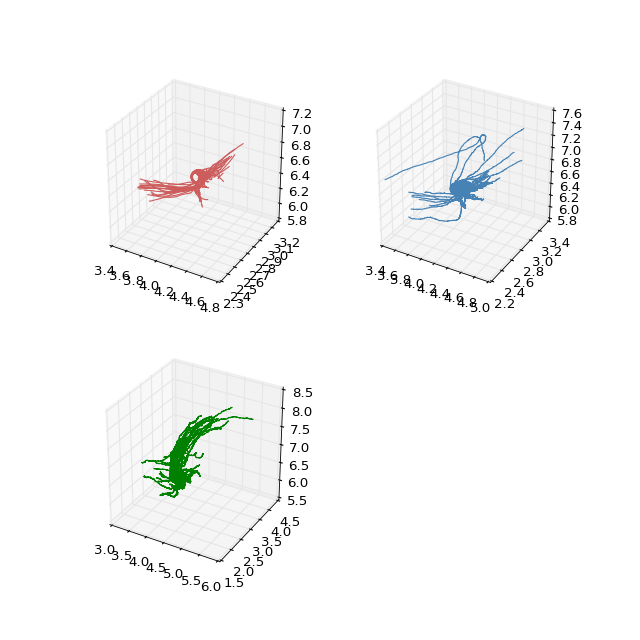

In [11]:
ind = 1
plot_seperately(ind, 50)

<IPython.core.display.Javascript object>


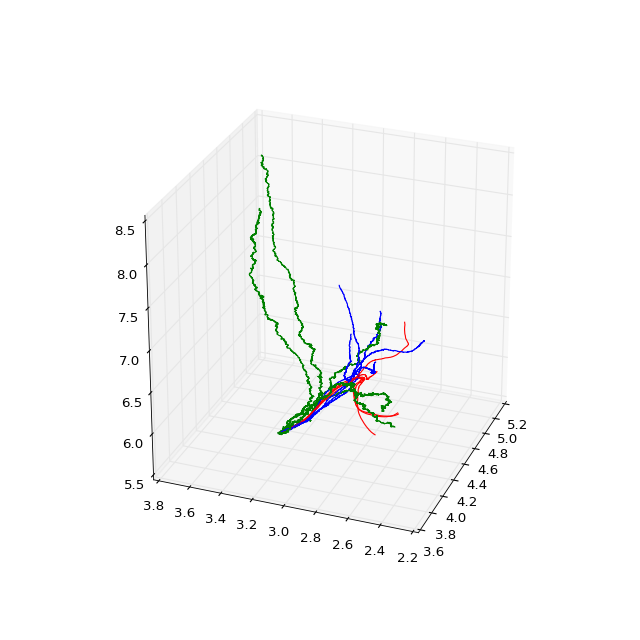

In [13]:
plot_together(ind, 5)

<IPython.core.display.Javascript object>


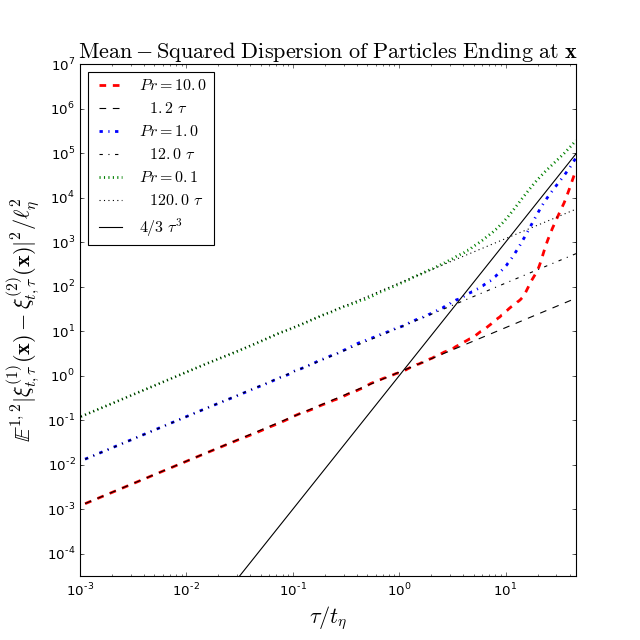

In [10]:
plot_dispersion(ind)